**IMPORT LIBRARIES**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature


**Display Image**

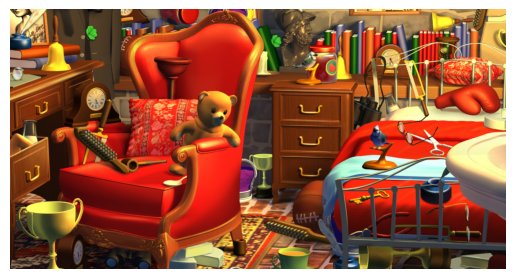

In [7]:
image = cv2.imread('/content/sample_data/CTO7qKsUkAA_lhk.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


**Divides the color space into bins (e.g., RGB or HSV) and counts the number of pixels in each bin.**

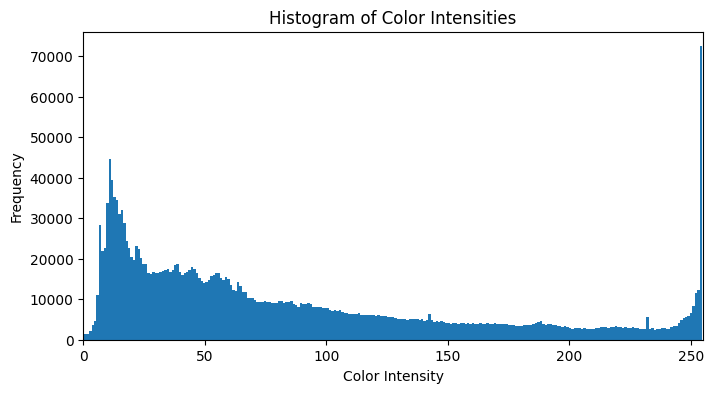

In [3]:
image = cv2.imread('/content/sample_data/CTO7qKsUkAA_lhk.png')


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


histogram, bin_edges = np.histogram(image_rgb, bins=256, range=(0, 255))


plt.figure(figsize=(8, 4))
plt.title('Histogram of Color Intensities')
plt.xlabel('Color Intensity')
plt.ylabel('Frequency')
plt.bar(bin_edges[:-1], histogram, width=1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()


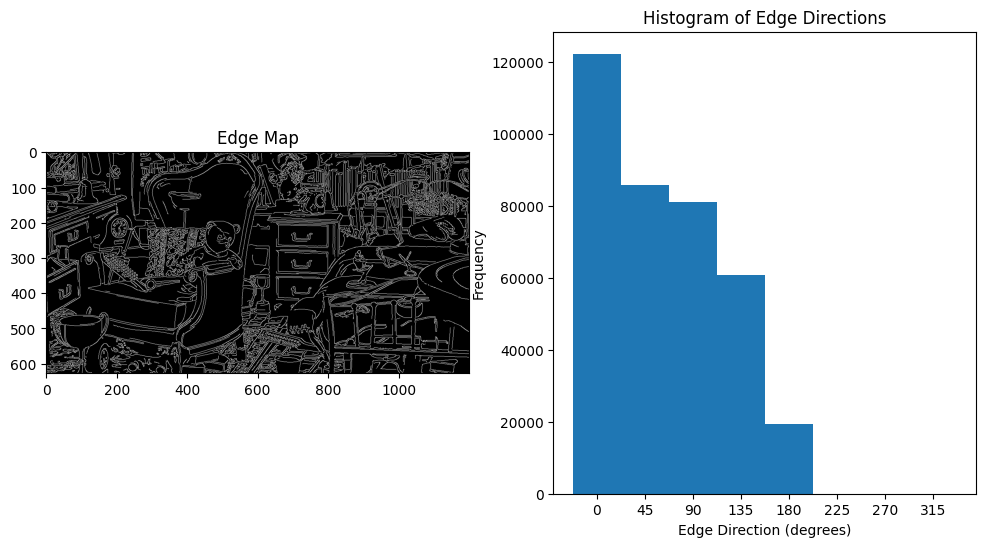

Histogram of Edge Directions (HED) Feature Vector:
[122200  85662  81029  60824  19353      0      0      0]


In [4]:
# Canny Edge Detection and Histogram of Edge Directions (HED):

image = cv2.imread('/content/sample_data/CTO7qKsUkAA_lhk.png', cv2.IMREAD_GRAYSCALE)

image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

edges = cv2.Canny(image_smoothed, threshold1=30, threshold2=70)

gradient_x = cv2.Sobel(image_smoothed, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image_smoothed, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_orientation = np.arctan2(gradient_y, gradient_x) * 180 / np.pi

hist, bin_edges = np.histogram(gradient_orientation, bins=8, range=(0, 360))

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(edges, cmap='gray')
plt.title('Edge Map')
plt.subplot(122)
plt.bar(bin_edges[:-1], hist, width=45, align='center')
plt.title('Histogram of Edge Directions')
plt.xlabel('Edge Direction (degrees)')
plt.ylabel('Frequency')
plt.xticks(range(0, 360, 45))
plt.show()

print("Histogram of Edge Directions (HED) Feature Vector:")
print(hist)


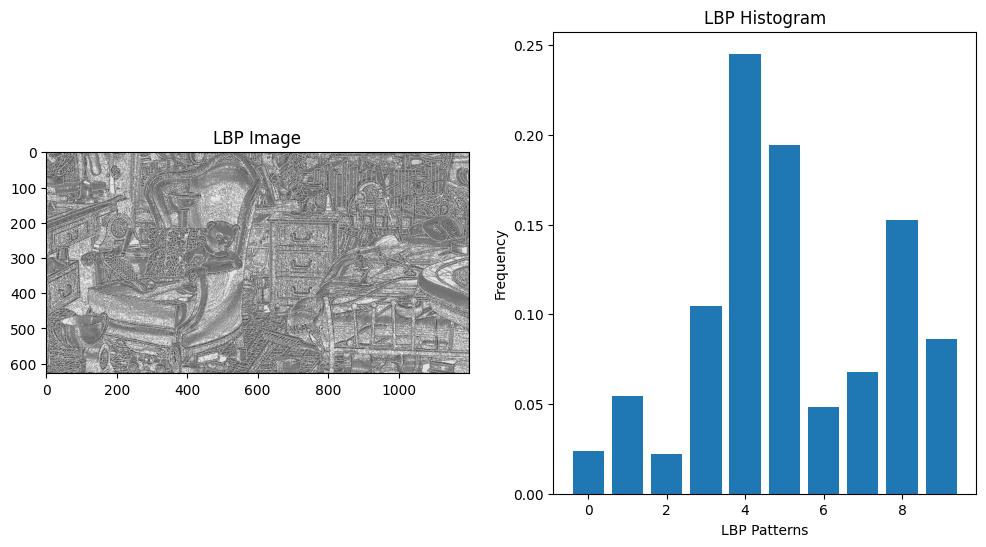

LBP Feature Vector:
[0.02361863 0.0545422  0.02218418 0.10454087 0.24522558 0.19427813
 0.04858678 0.06798036 0.15264464 0.08639862]


In [5]:
# Local Binary Pattern (LBP) Feature Extraction


image = cv2.imread('/content/sample_data/CTO7qKsUkAA_lhk.png', cv2.IMREAD_GRAYSCALE)


radius = 1
n_points = 8 * radius
lbp_image = feature.local_binary_pattern(image, n_points, radius, method='uniform')


hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))


hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')
plt.subplot(122)
plt.bar(range(0, n_points + 2), hist)
plt.title('LBP Histogram')
plt.xlabel('LBP Patterns')
plt.ylabel('Frequency')
plt.show()


print("LBP Feature Vector:")
print(hist)


In [6]:
'''
#part A)

HOW IT WORKS :

1.Histogram of Edge Directions (HED) : By detecting sudden variations in intensity, the Canny Edge Detection approach locates edges in a picture.
  It works by first applying a Gaussian filter to smooth the image and remove noise. Then, it calculates the
  gradient of the image to identify areas with notable intensity fluctuations. The edges are extracted using thresholding at the end.
  The image's edge orientations are shown in the histogram of edge directions (HED). To display the distribution of edge orientations,
  a histogram is built by calculating the direction or angle of each edge pixel.
2.LBP is a texture analysis method that looks at how a core pixel interacts with its surrounding pixels. Based on comparisons of intensity,
 it encodes these correlations into binary patterns. To create a histogram that depicts the distribution of local texture patterns,
 the generated patterns are put to use.

SUTAIBLE FOR :

1.Histogram of Edge Directions (HED) : suitable for images with well-defined edges
     - Images of architecture that clearly show the edges and lines of the structures.
     - X-ray images for identifying bone edges.
     - Rock formations that are clearly visible in geological photos.
2.Local Binary Pattern (LBP) is a texture analysis method that looks at how a core pixel interacts with its surrounding pixels.
      Based on comparisons of intensity, it encodes these correlations into binary patterns.
      A histogram depicting the distribution of local texture patterns is built using the resultant motifs.
     - Textures created by humans, like fabric, brick walls, and tiles.
     - Biomedical images for identifying the texture of cells and tissues.
     - Recognition of fingerprints based on ridge patterns.

'''

"\n#part A)\n\nHOW IT WORKS :\n\n1.Histogram of Edge Directions (HED) : By detecting sudden variations in intensity, the Canny Edge Detection approach locates edges in a picture.\n  It works by first applying a Gaussian filter to smooth the image and remove noise. Then, it calculates the\n  gradient of the image to identify areas with notable intensity fluctuations. The edges are extracted using thresholding at the end.\n  The image's edge orientations are shown in the histogram of edge directions (HED). To display the distribution of edge orientations,\n  a histogram is built by calculating the direction or angle of each edge pixel.\n2.LBP is a texture analysis method that looks at how a core pixel interacts with its surrounding pixels. Based on comparisons of intensity,\n it encodes these correlations into binary patterns. To create a histogram that depicts the distribution of local texture patterns,\n the generated patterns are put to use.\n\nSUTAIBLE FOR :\n\n1.Histogram of Edge Di

In [9]:
'''
#part B)

Advantages

1. Edge Directions (HED)  : Benefits of using the Histogram of Edge Directions (HED) to
classify materials By accurately capturing structural information and highlighting clearly defined edges
and patterns, HED excels at material analysis and is especially well suited for materials with distinct
structural features. By supplying vital orientation data, necessary for differentiating materials with
variable directional textures, it improves material discrimination. Additionally, HED's graphical representations,
such as edge maps and histograms, provide researchers and analysts with clear insights into the distribution of
edges across the material, assisting them in comprehending the textures of various materials. A major issue in
tasks involving material categorization is inconsistent performance under various lighting circumstances,
which is another benefit of its resistance to illumination variations.


2. Local Binary Pattern (LBP) :  LBP has a number of benefits in material classification.
It is a fantastic choice for materials with complicated and distinctive texture variations
since it is adept at capturing regional texture patterns. Even when materials are presented
in images with varying orientations or sizes, it can still be accurately classified thanks
to its robustness to rotation and scale variations. In real-world material categorization
settings with shifting lighting conditions, LBP's capacity to accommodate changes in illumination
is especially useful. Furthermore, because of how efficiently it uses resources, it is appropriate
for real-time or resource-limited applications where rapid and effective material analysis is crucial.

LIMITATIONS

1. Edge Directions (HED) :Histogram of Edge Directions (HED) has limitations for describing
materials Despite being efficient in capturing structural data, HED has some drawbacks. Due
to its major attention on edge sensitivity, it could have trouble capturing fine-grained
texture features in homogeneous sections of materials. The thresholding settings chosen might
have a big impact on performance and might need to be manually adjusted for various conditions
and materials. Furthermore, HED might not be the most effective technique for materials with hazy
or erratic textures and ill-defined edges, demanding investigation of substitute methods for
precise material classification.

2. Local Binary Pattern (LBP): LBP has drawbacks that should be taken into account despite its benefits
in the classification of materials. It is less suited for materials that strongly rely on large-scale
patterns or structures that require a broader contextual understanding because of its emphasis on local
texture patterns, which could lead to a lack of concern for global context. When textures are not uniform,
the uniformity assumption in LBP may not hold true for all materials, which could result in classification
mistakes. Further complicating its usage in material analysis is the sensitivity of LBP to variables like
neighborhood size and sampling point counts, which necessitates careful parameter calibration for reliable
classification results.
'''

"\n#part B)\n\nAdvantages\n\n1. Edge Directions (HED)  : Benefits of using the Histogram of Edge Directions (HED) to \nclassify materials By accurately capturing structural information and highlighting clearly defined edges\nand patterns, HED excels at material analysis and is especially well suited for materials with distinct\nstructural features. By supplying vital orientation data, necessary for differentiating materials with \nvariable directional textures, it improves material discrimination. Additionally, HED's graphical representations,\nsuch as edge maps and histograms, provide researchers and analysts with clear insights into the distribution of \nedges across the material, assisting them in comprehending the textures of various materials. A major issue in\ntasks involving material categorization is inconsistent performance under various lighting circumstances, \nwhich is another benefit of its resistance to illumination variations.\n\n\n2. Local Binary Pattern (LBP) :  LBP ha